#  Determine the initial value of the center point

# Problem 1: Determine the initial value of the center point
create code that determines initial value of 
 center points 
 to 
 from input data. where 
 is the specified no. of clusters.

In [1]:
# importing libraries
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

In [2]:
# a global function to calculate the distance
def eucledian_distance(x1,x2):
  distance = np.sqrt(np.sum((x1-x2)**2))
  return np.sqrt(np.sum((x1-x2)**2))

# class of K-means cluster
class ScratchKMeans():
    def __init__(self, k=5, max_iters=100, verbose=False):
        self.k = k
        self.max_iters = max_iters
        self.verbose = verbose
        self.sse = []
        
        # initializing an empty list of sample indeces for each cluster
        self.clusters = [[] for _ in range(self.k)]
        
        # a list to store the mean of feature vector 
        self.centroids = []
        
    def fit(self, X):
        if self.verbose:
            print()
        return
    
    def fit_predict(self,X):
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # initialize the centroids
        random_samples_idxs = np.random.choice(self.n_samples, self.k, replace=False)
        self.centroids = [self.X[idx] for idx in random_samples_idxs]
        
        # optimization
        for _ in range(self.max_iters):
            # update cluster
            self.clusters = self._create_clusters(self.centroids)
            
            # update centroids
            # store old centroids
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            # check for if the centroids are not changing anymore(and stop)
            if self._is_converged(centroids_old, self.centroids):
              # calculating the sse
              for i,cluster in enumerate(self.clusters):
                for sample_idx in cluster:
                  self.sse.append(eucledian_distance(X[sample_idx],self.centroids[i]))
              break
        return self._get_cluster_labels(self.clusters)
    
    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            # getting closest centroids index
            centroids_idx = self._closest_centroid(sample, centroids)
            clusters[centroids_idx].append(idx)
        return clusters
    
    def _closest_centroid(self, sample, centroids):
        # calc distance of all samples to the centroids
        distances = [eucledian_distance(sample,point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx
    
    def _get_centroids(self,clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    def _is_converged(self, centroids_old, centroids):
        distances = [eucledian_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0
    
    def _get_cluster_labels(self,clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx,cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels
    
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color='black', linewidth=2)

        plt.show()

In [3]:
# splitting our dataset
X,_ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

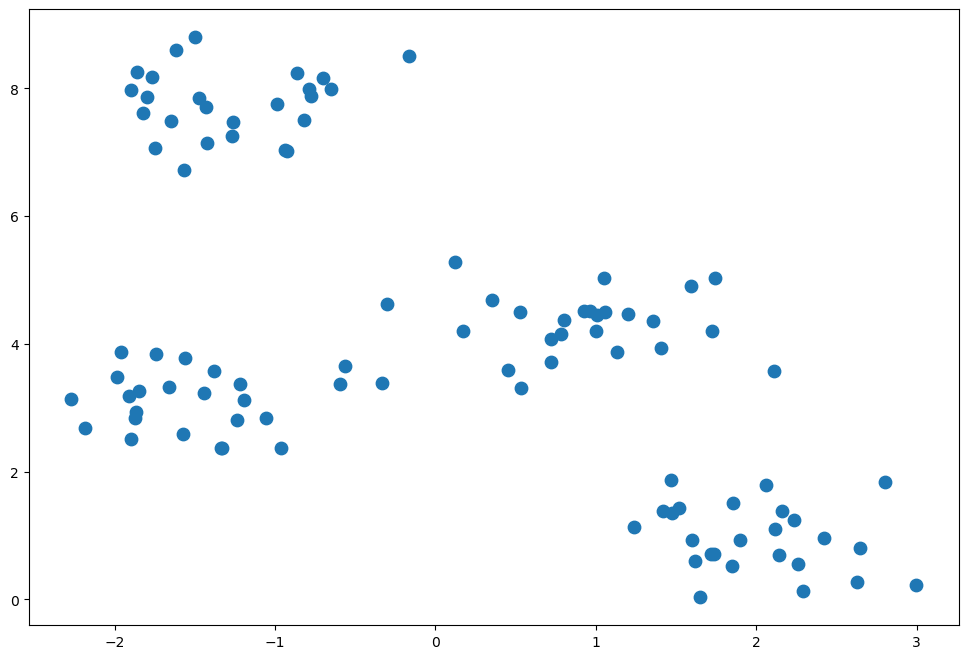

In [4]:
# visualize the dataset
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(X[:,0],X[:,1],s=80);

In [5]:
k = 4
center_points = X[np.random.choice(len(X),size=k,replace=False)]
print("randomly selected center points: ", center_points)

randomly selected center points:  [[-2.18485772  2.68708996]
 [ 1.73810647  0.71629308]
 [-1.84482705  3.25609891]
 [ 1.40848818  3.93270482]]


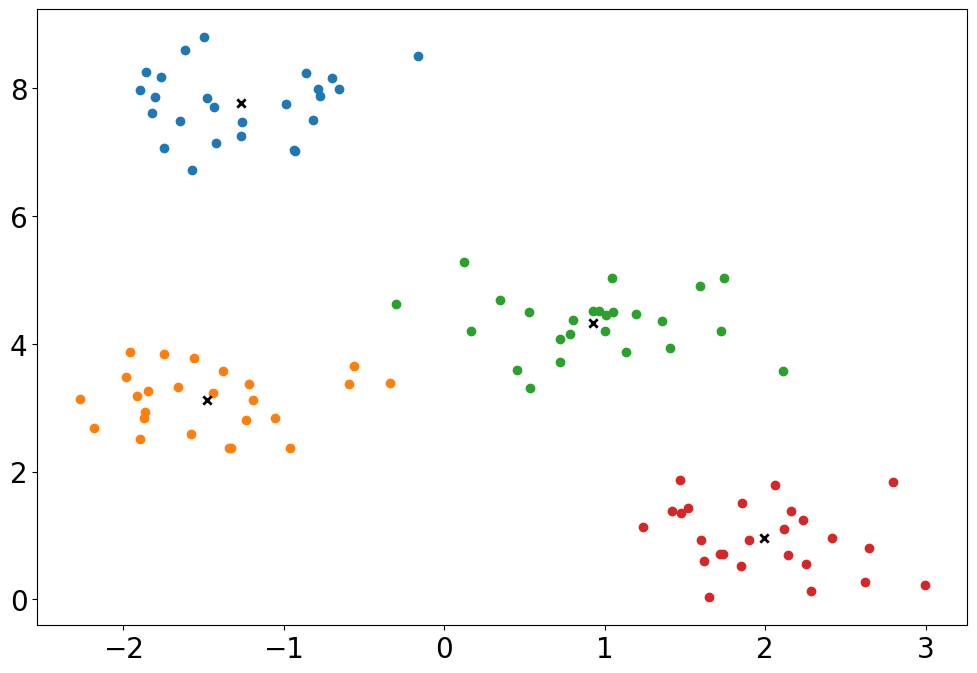

In [6]:
clusters = len(np.unique(_))
k = ScratchKMeans(k=4, max_iters=150, verbose=True)
y_pred = k.fit_predict(X)
k.plot()

# Implementation of elbow method

the k = 1
sse = 264.23375429919724
the k = 2
sse = 169.5198874181266
the k = 3
sse = 103.63271391895239
the k = 4
sse = 100.55380437930059


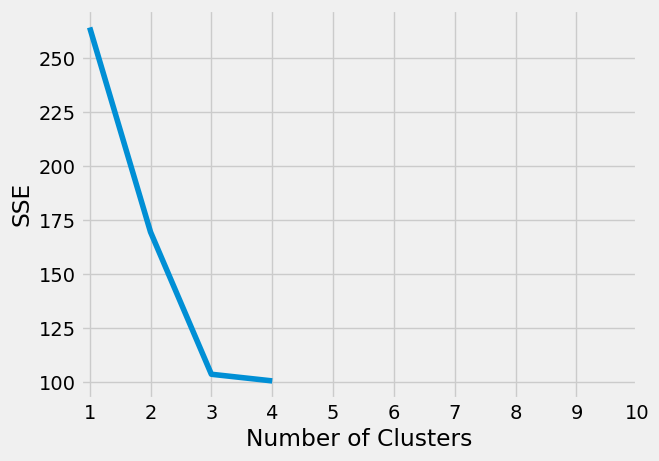

In [7]:
sse = []
for k in range(1, 5):
  k2 = ScratchKMeans(k, max_iters=150, verbose=True)
  y_pred2 = k2.fit_predict(X)
  sse.append(sum(k2.sse))
  print("the k =",k)
  print("sse =",sum(k2.sse))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 5), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

- From the judgement of the elbow method shown above the best k value is 3

In [9]:
data = pd.read_csv("Wholesale customers data.csv")
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

In [10]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


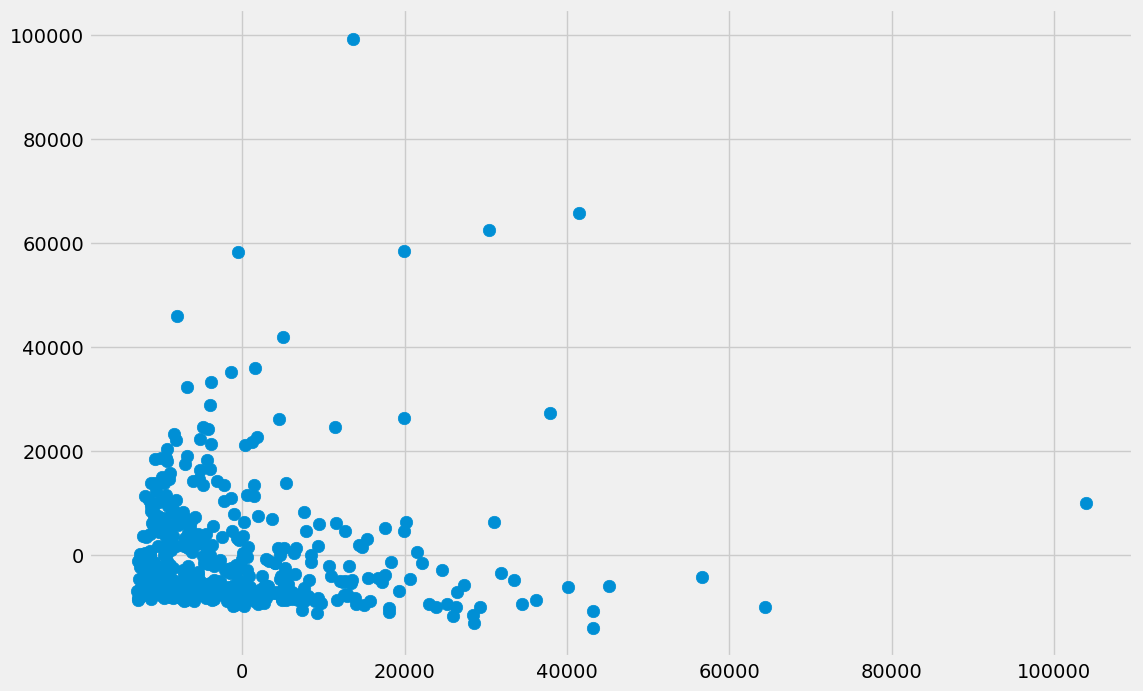

In [12]:
fig = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 20
plt.scatter(data_pca[:,0],data_pca[:,1],s=80);

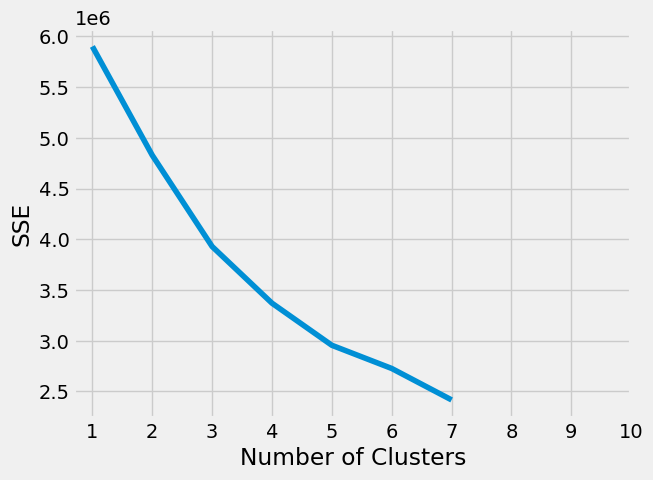

In [13]:
sse2 = []
for k in range(1, 8):
  k3 = ScratchKMeans(k, max_iters=150, verbose=True)
  y_pred3 = k3.fit_predict(data_pca)
  sse2.append(sum(k3.sse))
plt.style.use("fivethirtyeight")
plt.plot(range(1, 8), sse2)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

- From the elbow method i would choose 3 to be the number of k

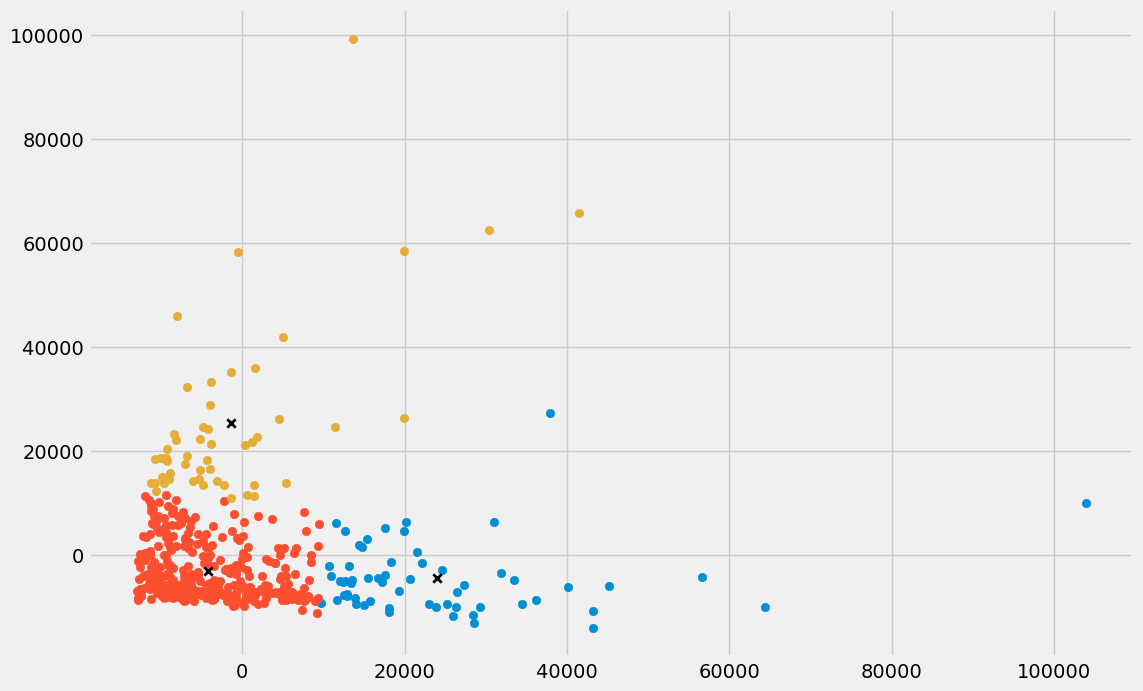

In [14]:
k4 = ScratchKMeans(k=3, max_iters=150, verbose=True)
y_pred3 = k4.fit_predict(data_pca)
k4.plot()

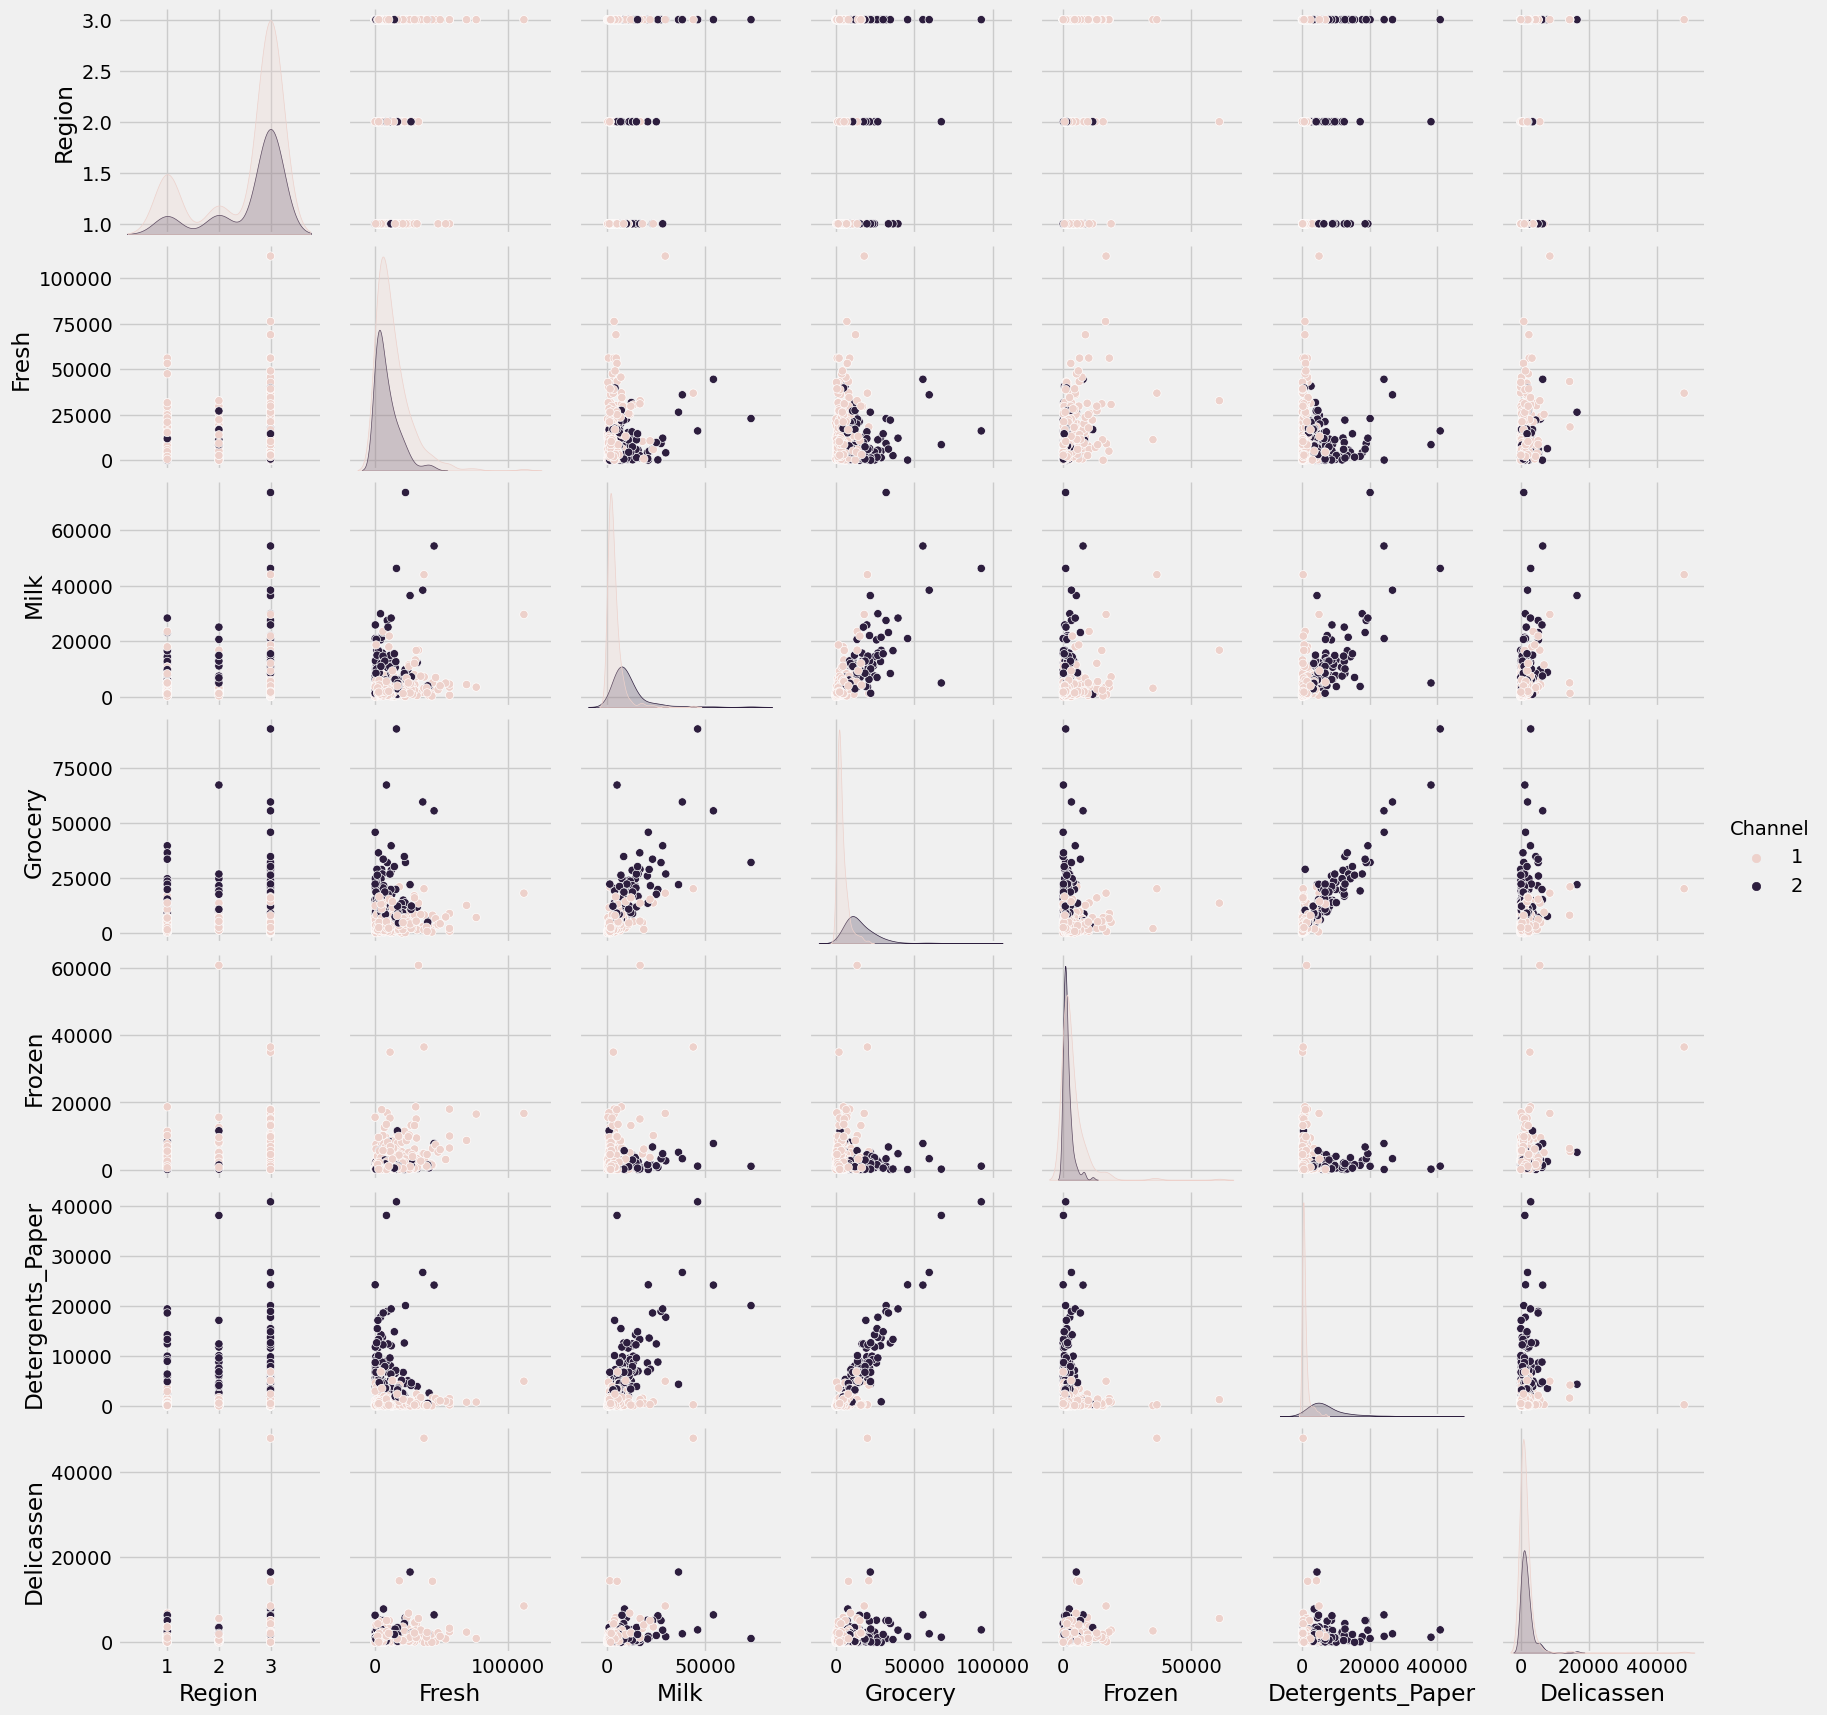

In [15]:
# Comparison with known groups
sns.pairplot(data,hue='Channel');

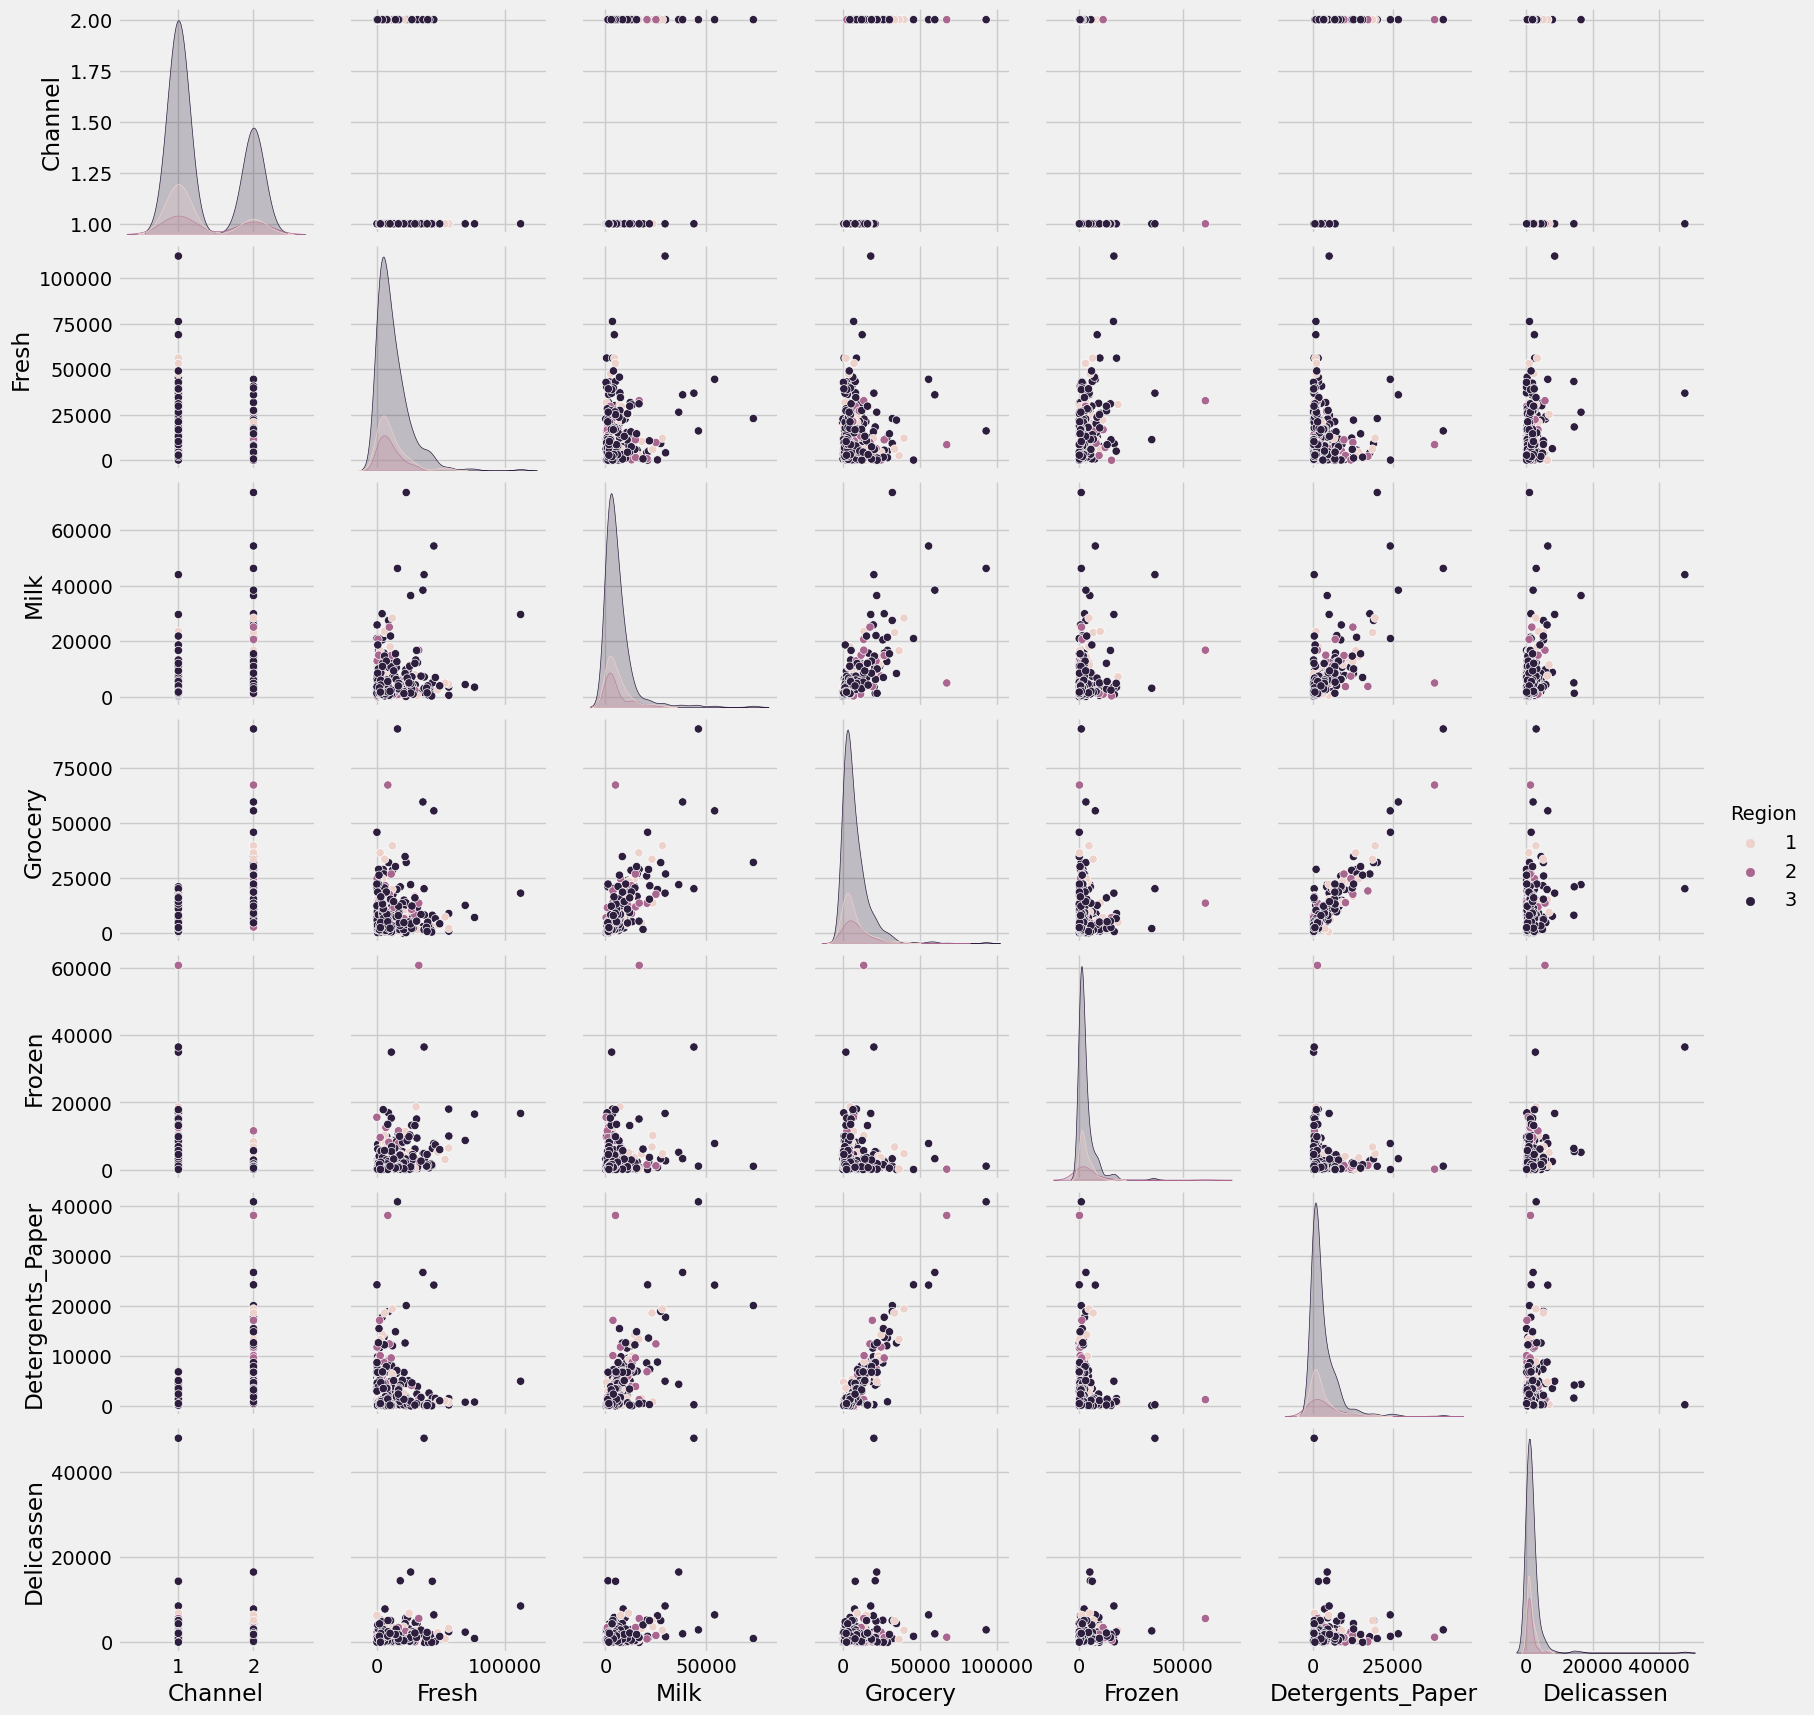

In [16]:
sns.pairplot(data,hue='Region');

In [17]:
data.groupby(['Channel','Region']).count()

Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                            
1       1          59    59       59      59                59          59
        2          28    28       28      28                28          28
        3         211   211      211     211               211         211
2       1          18    18       18      18                18          18
        2          19    19       19      19                19          19
        3         105   105      105     105               105         105

In [18]:
# add clusters to the dataset
data['clusters'] = y_pred3[:,]
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,1.0
1,2,3,7057,9810,9568,1762,3293,1776,1.0
2,2,3,6353,8808,7684,2405,3516,7844,1.0
3,1,3,13265,1196,4221,6404,507,1788,1.0
4,2,3,22615,5410,7198,3915,1777,5185,0.0


As noted from the results obtained, clustering method produced different results from the obvious categorization method